In [1]:
#includes

import os
import data_utils

import matplotlib.pyplot as plt

In [2]:
# Paths to the data folders

yolo_images = './All_Datasets/filtered_ls_data/images'
yolo_labels = './All_Datasets/filtered_ls_data/labels'

datasets = 'All_Datasets'


filtered_ls_data


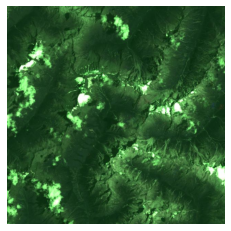

In [5]:
# path to an image
image_path = 'All_Datasets/filtered_ls_data/images/LT05_L1TP_130038_19860807_20170221_01_T1_patch_1920_5120.jpeg'

# display the image using matplotlib
data_utils.display_image_jupyter_notebook(image_path)



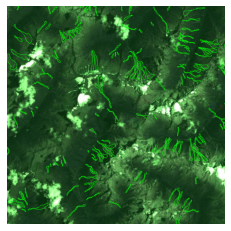

In [6]:
# Get the list of labels
label_path = 'All_Datasets/filtered_ls_data/labels/LT05_L1TP_130038_19860807_20170221_01_T1_patch_1920_5120.txt'

# read the label file
labels = data_utils.print_yolo_labels_on_image_jupyter_notebook(image_path, label_path)
